In [20]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score;

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
135,23,63000,0
313,49,141000,1
1,35,20000,0
45,23,20000,0
392,45,45000,1


In [6]:
df.shape

(400, 3)

In [7]:
x_train, x_test, y_train, y_test=train_test_split(df.iloc[:,:2],df.iloc[:,-1],test_size=0.3,random_state=0);
x_train.shape, y_train.shape

((280, 2), (280,))

In [8]:
scaling = StandardScaler()

In [9]:
x_train_scaling = scaling.fit_transform(x_train)
x_test_scaling = scaling.transform(x_test)

In [10]:
x_train_scaling = pd.DataFrame(x_train_scaling,columns=x_train.columns)
x_test_scaling = pd.DataFrame(x_test_scaling,columns=x_test.columns)

In [11]:
x_train_scaling

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

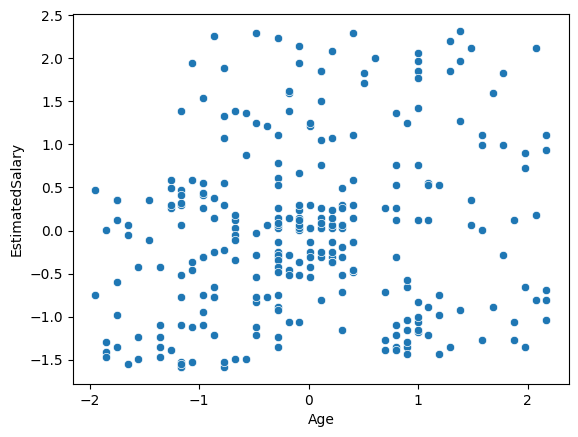

In [12]:
sns.scatterplot(x=x_train_scaling['Age'],y=x_train_scaling['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

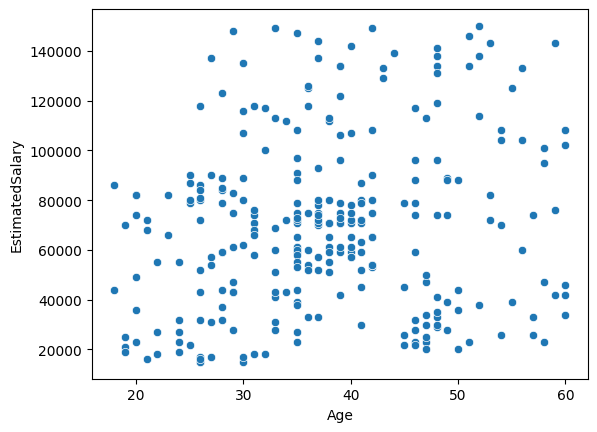

In [13]:
sns.scatterplot(x=x_train['Age'],y=x_train['EstimatedSalary'])

In [14]:
lr = LogisticRegression();
lr_scale = LogisticRegression();

In [16]:
lr.fit(x_train,y_train)
lr_scale.fit(x_train_scaling,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = lr.predict(x_test)
y_pred_scale = lr_scale.predict(x_test_scaling)

In [22]:
print("Without Scaling: ",accuracy_score(y_test,y_pred))
print("With Scaling: ",accuracy_score(y_test,y_pred_scale))

Without Scaling:  0.875
With Scaling:  0.8666666666666667
